In [1]:
# my tutorial

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# pandas datareader
symbol = 'WATT'
df = pdr.DataReader(symbol, data_source='yahoo')

In [4]:
# save to csv file
df.to_csv('/tmp/' + symbol + '.csv')

In [2]:
# read csv file
df = pd.read_csv('../../src/assets/hqcsv/download/WATT.csv', index_col=[0], parse_dates=True)

In [9]:
# row to array
a = df.iloc[df.shape[0] - 1].to_numpy().tolist()
a = ['WATT', df.index[df.shape[0] - 1].strftime("%Y-%m-%d")] + a
df[df.Volume == 2927400].Close[0]

4.329999923706055

In [6]:
# show data size
df.shape

(1258, 6)

In [7]:
# generate serial number
df['No'] = [df.index.get_loc(idx) for idx in df.index]

In [8]:
# filter rows
df[df.No % 1000 == 999]

,High,Low,Open,Close,Volume,Adj Close,No
Date,,,,,,,
2020-02-04,1.83,1.6,1.6,1.77,825600,1.77,999


In [9]:
# split df into set of rows and sum Volume
size = 20
splits = [df.iloc[i:i+size-1,:].Volume.sum() for i in range(0, df.shape[0], size)]
len(splits)

63

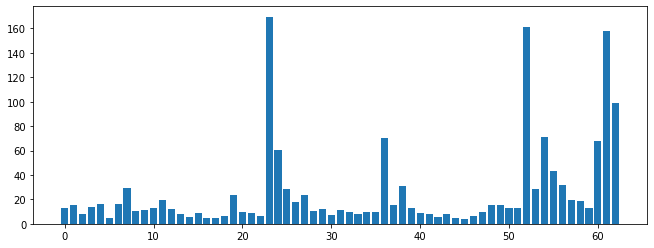

In [10]:
# bar chart
plt.figure(figsize=[11, 4])
plt.bar(range(0, len(splits)), height = np.array(splits)/1000000, label='Men')
plt.show()

In [43]:
#cols = ['Date', 'HqType']
cols = df.columns.values.tolist()
cols.insert(0, 'Date')
cols

['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'No']

In [13]:
df2 = pd.DataFrame(columns=df.columns)